In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

# Split into training (80%) and testing (20%) sets randomly
x_train, x_test, y_train, y_test = train_test_split(x_train_full, y_train_full, test_size=0.1, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 784
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\chuma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8634 - loss: 0.4829 - val_accuracy: 0.9503 - val_loss: 0.1789
Epoch 2/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9619 - loss: 0.1274 - val_accuracy: 0.9656 - val_loss: 0.1124
Epoch 3/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9760 - loss: 0.0764 - val_accuracy: 0.9662 - val_loss: 0.1069
Epoch 4/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9828 - loss: 0.0570 - val_accuracy: 0.9684 - val_loss: 0.1030
Epoch 5/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9856 - loss: 0.0474 - val_accuracy: 0.9726 - val_loss: 0.0924
Epoch 6/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9890 - loss: 0.0352 - val_accuracy: 0.9748 - val_loss: 0.0901
Epoch 7/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9918 - loss: 0.0275 - val_accuracy: 0.9759 - val_loss: 0.0921
Epoch 8/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9926 - loss: 0.0226 - 

In [6]:
# Save the model
model.save('mnist_model.h5')

print("Model saved successfully.")


Model saved successfully.


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9752 - loss: 0.1161

Test accuracy: 0.9781666398048401


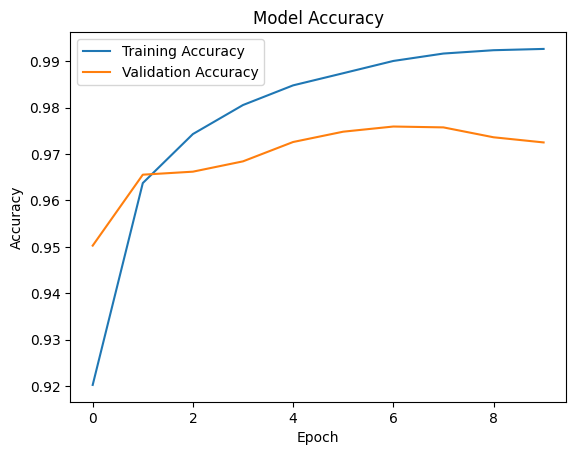

In [7]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9752 - loss: 0.1161

Test accuracy: 0.9781666398048401
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:


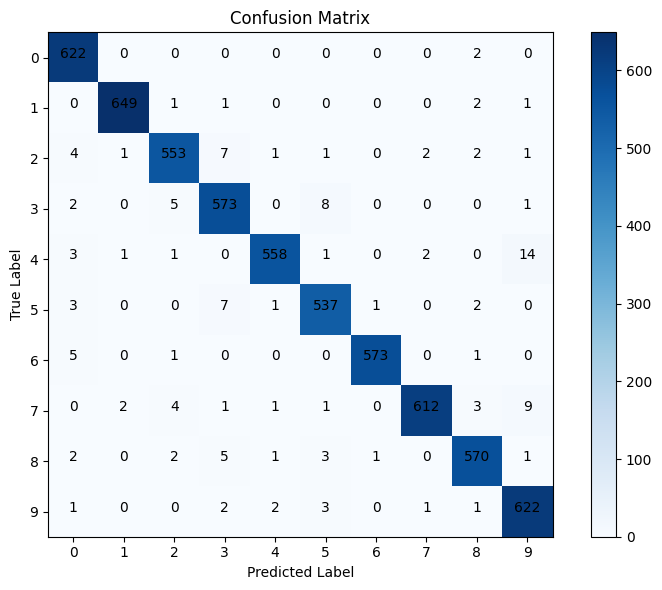

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

# Predict classes for test set
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')


plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, [str(i) for i in range(10)])
plt.yticks(tick_marks, [str(i) for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="black")
plt.show()


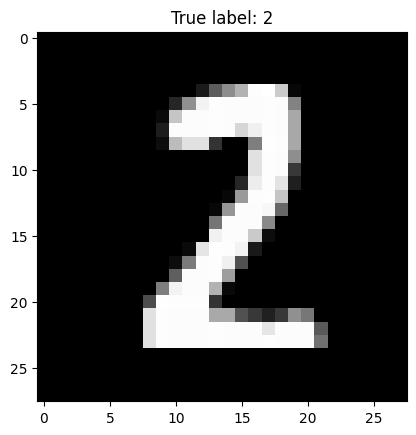

In [9]:
random_index = np.random.randint(4, len(x_test))
random_image = x_test[random_index]
true_label = np.argmax(y_test[random_index])

# Plot the random image
plt.figure()
plt.imshow(random_image, cmap='gray')
plt.title(f'True label: {true_label}')
plt.show()

In [10]:
predicted_label = np.argmax(model.predict(np.expand_dims(random_image, axis=0)))

# Print the prediction
print(f'True label: {true_label}, Predicted label: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
True label: 2, Predicted label: 2


Image array shape: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[1.04290084e-10 5.22915755e-09 9.99944568e-01 5.53356258e-05
  5.65828628e-24 1.06856099e-07 5.98674160e-18 4.15343385e-14
  9.09306450e-11 8.18840273e-10]]


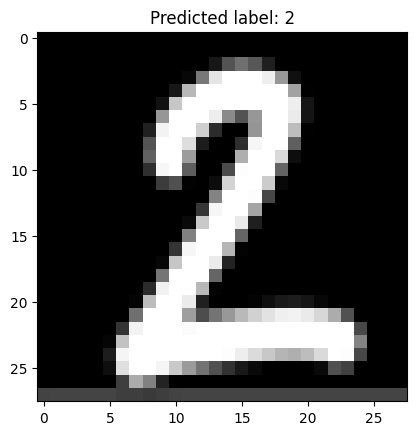

2

In [31]:
from PIL import Image
def predict_image_from_file(filepath):
    try:
        # Load the image
        img = Image.open(filepath).convert('L')  # Convert to grayscale
        img = img.resize((28, 28))  # Resize to model's input dimensions
        img_array = np.array(img) / 255.0  # Normalize pixel values
      
        # Ensure the image array has the correct shape
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
        img_array = img_array.reshape(1, 28, 28)  
        # Print the shape of the image array
        print("Image array shape:", img_array.shape)

        # Predict the label
        prediction = model.predict(img_array)
        print(prediction)
        predicted_label = np.argmax(prediction, axis=1)[0]

        # Plot the image with the predicted label
        plt.figure()
        plt.imshow(img, cmap='gray')
        plt.title(f'Predicted label: {predicted_label}')
        plt.show()

        return predicted_label

    except Exception as e:
        print(f"Error loading image: {e}")
        return None
# Example usage: Predict an image from file
predict_image_from_file(r'B:\IMLprojfinal\2.png')

Image array shape: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[2.0707044e-25 4.3896904e-13 7.6092355e-13 1.0000000e+00 4.0041426e-22
  1.1603115e-09 2.0084027e-27 3.0504878e-18 2.5703531e-13 6.7190640e-16]]


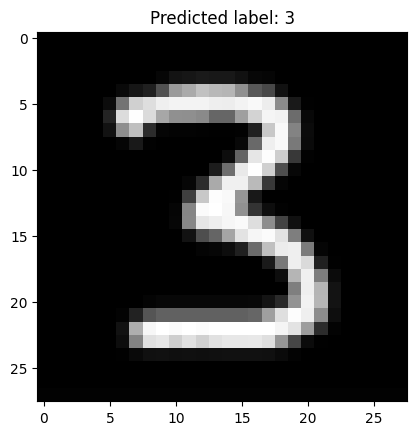

3

In [32]:
predict_image_from_file(r'B:\IMLprojfinal\3.png')